In [0]:
from keras.datasets import cifar10

In [96]:
(X_train,y_train),(X_test,y_test) =  cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


255

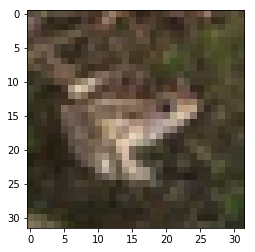

In [103]:
import matplotlib.pyplot as plt
plt.imshow(X_train[22])
X_train.max()

In [107]:
X_train.shape


(50000, 32, 32, 3)

In [105]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [0]:
X_train  = X_train/X_train.max()

In [0]:
X_test = X_test/X_test.max()

In [40]:
X_train = X_train.reshape(60000,28,28,1)
X_train.shape

(60000, 28, 28, 1)

In [44]:
X_test = X_test.reshape(10000,28,28,1)
X_test.shape

(10000, 28, 28, 1)

In [0]:
from keras.utils import to_categorical
y_train_cat = to_categorical(y_train,10)
y_test_cat = to_categorical(y_test,10)

In [0]:
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [0]:
model = Sequential()

In [0]:
model.add(Conv2D(filters = 32 , kernel_size = (4,4) , input_shape = (32,32,3) , activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))

In [0]:
model.add(Conv2D(filters = 32 , kernel_size = (4,4) , input_shape = (32,32,3) , activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))

In [0]:
model.add(Flatten())

In [0]:
model.add(Dense(500,activation = 'relu'))
model.add(Dense(10,activation = 'softmax'))

In [0]:
model.compile(loss = 'categorical_crossentropy', optimizer ='rmsprop' , metrics = ['accuracy'])


In [148]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 2, 2, 32)          16416     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 1, 1, 32)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 32)               

In [149]:
model.fit(X_train,y_train_cat,epochs = 2)

Epoch 1/2
50000/50000 [==============================] - 60s 1ms/step - loss: 2.3053 - acc: 0.0994
Epoch 2/2
50000/50000 [==============================] - 60s 1ms/step - loss: 2.3057 - acc: 0.0981


In [150]:
model.metrics_names


['loss', 'acc']

In [151]:
model.evaluate(X_test,y_test_cat)


10000/10000 [==============================] - 4s 359us/step


[2.3061056312561035, 0.1]

In [0]:
from sklearn.metrics import classification_report
predictions = model.predict_classes(X_test)

In [153]:
predictions

array([4, 4, 4, ..., 4, 4, 4])

In [154]:
y_test_cat

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [156]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1000
           1       0.00      0.00      0.00      1000
           2       0.00      0.00      0.00      1000
           3       0.00      0.00      0.00      1000
           4       0.10      1.00      0.18      1000
           5       0.00      0.00      0.00      1000
           6       0.00      0.00      0.00      1000
           7       0.00      0.00      0.00      1000
           8       0.00      0.00      0.00      1000
           9       0.00      0.00      0.00      1000

    accuracy                           0.10     10000
   macro avg       0.01      0.10      0.02     10000
weighted avg       0.01      0.10      0.02     10000



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
